In [1]:
import numpy as np
import pytesseract
#tessdata_dir_config = '--tessdata-dir "C:\\Program Files (x86)\\Tesseract-OCR\\tessdata"'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2
import os

In [2]:
import matplotlib.pyplot as plt

def afficher(image, cmap='gray'):
    # Créer une nouvelle figure avec une taille spécifiée
    fig = plt.figure(figsize=(12, 10))

    # Ajouter un sous-graphique à la figure
    ax = fig.add_subplot(111)

    # Afficher l'image sur le sous-graphique avec la colormap spécifiée
    ax.imshow(image, cmap=cmap)

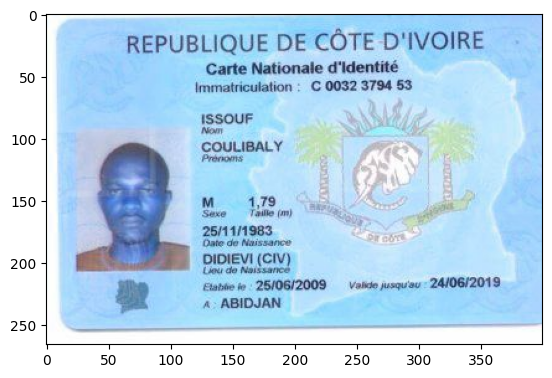

REPUBLIQUE DE COTE D'IVOIRE

Carte Nationale d'identité
Immaticulation C0032 3794 53

IssOUF
COULIBALY

179

2511111983

DIDIEW CI)
rm) hater 25/06/2009 Vande nqu'u 24/06/2019
«ABIDJAN



In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Charger l'image
img = cv2.imread('cni.jpg')

# Afficher l'image
plt.imshow(img)
plt.show()

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage pour améliorer la lisibilité
th, threshed = cv2.threshold(gray, 185, 230, cv2.THRESH_TRUNC)

# Utiliser Pytesseract pour extraire les données du texte
text1 = pytesseract.image_to_data(threshed, output_type='data.frame')
text2 = pytesseract.image_to_string(threshed)

# Afficher le texte extrait
print(text2)

# Filtrer les résultats par la confiance du texte
text = text1[text1.conf != -1]

# Regrouper les lignes de texte par bloc
lines = text.groupby('block_num')['text'].apply(list)

# Calculer la confiance moyenne par bloc
conf = text.groupby(['block_num'])['conf'].mean()


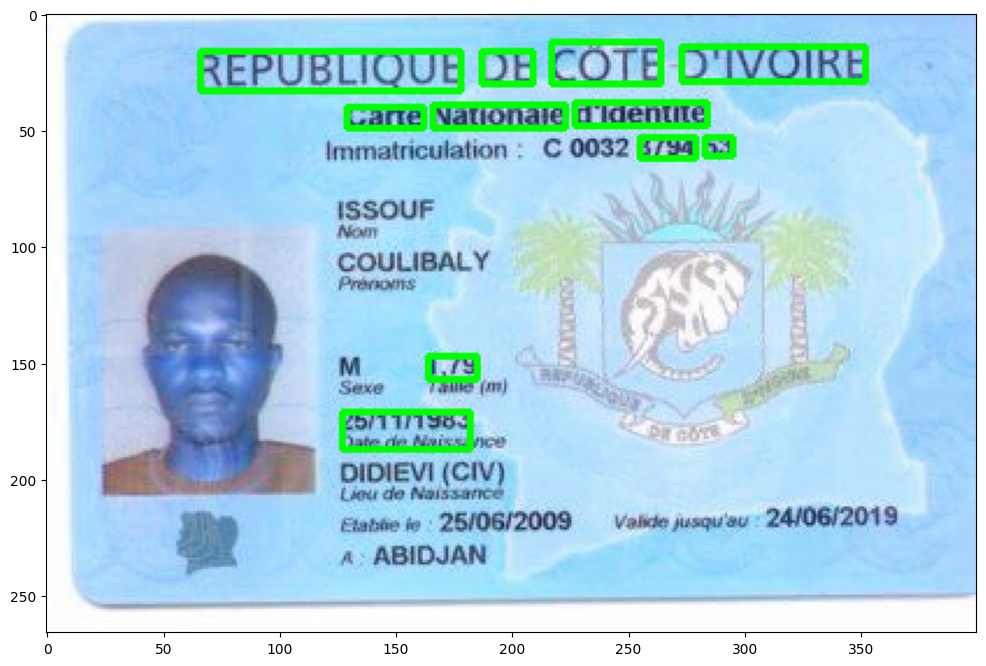

In [4]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

afficher(img)